In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive





---

# **Importing Necessary Libraries**

---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

#**Loading the Dataset**
---



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Healthcare Providers.csv")
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


**Extracting the information from the Dataset**

---





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

#**Number of unique values of each feature**
---

In [ ]:
# This is a loop that iterates through each column in the dataframe and gets the number of unique values in each column
for i, x in enumerate(df.columns):
  
  # This line gets the number of unique values in the current column
  val = len(df[x].unique())
  
  # This line gets the names of all the columns in the dataframe
  cols = df.columns
  
  # This line prints out a message with the name of the current column and the number of unique values in that column
  print(f"The number of unique values in {cols[i]} is {val}")


The number of unique values in index is 100000
The number of unique values in National Provider Identifier is 89508
The number of unique values in Last Name/Organization Name of the Provider is 42820
The number of unique values in First Name of the Provider is 13023
The number of unique values in Middle Initial of the Provider is 30
The number of unique values in Credentials of the Provider is 1855
The number of unique values in Gender of the Provider is 3
The number of unique values in Entity Type of the Provider is 2
The number of unique values in Street Address 1 of the Provider is 51928
The number of unique values in Street Address 2 of the Provider is 10025
The number of unique values in City of the Provider is 5846
The number of unique values in Zip Code of the Provider is 47827
The number of unique values in State Code of the Provider is 58
The number of unique values in Country Code of the Provider is 4
The number of unique values in Provider Type is 90
The number of unique val

**Extracting the information from the Dataset**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

# **Replacing NAN values with Mode of that particular Feature**

---



In [ ]:
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [ ]:
# Function to replace the nan values with mode value of the feature

def replace_nan_with_mode(df, column_name):
    mode = df[column_name].mode()[0]                           # get the mode of the column
    df[column_name].fillna(mode, inplace=True)                 # replace NaN values with the mode
    return df

df = replace_nan_with_mode(df, "Credentials of the Provider")  # Applying the function on those features whose NAN values are to 
                                                               # be replaced by Mode of that particular feature
df = replace_nan_with_mode(df, "Gender of the Provider")

In [ ]:
df.isnull().sum()  # We see that the sum of null values of most of the features is 0 except some 
                   # of then which are anyways unwanted features and later have to be dropped

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                     0
Gender of the Provider                                          0
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [ ]:
df.info() # We see that many features are of object datatype.
          # So our next task is to convert those features into
          # int or float datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               100000 non-null  object 
 6   Gender of the Provider                                    100000 non-null  object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

# **Cleaning the Dataset and applying LabelEncoder**

---



In [ ]:
# Import the LabelEncoder class from the sklearn.preprocessing library
from sklearn.preprocessing import LabelEncoder

# Define a function called RemoveComma that takes in a string as input and replaces commas with nothing
def RemoveComma(x):
  return x.replace(",","")

# Initialize a LabelEncoder object
le = LabelEncoder()

# Loop through the first 27 columns of the dataframe
for i in range(27):
  
  # If the current column is one of the first 20 columns (i.e., columns 0-19), use the LabelEncoder object to transform the values in that column
  if(i<=19):
    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])
    
  # Otherwise, convert the values in the current column to numeric format using pd.to_numeric() and apply the RemoveComma function to remove any commas in the data
  else:
    df.iloc[:, i] = pd.to_numeric(df.iloc[:,i].apply(lambda x: RemoveComma(x)), errors = "ignore")


In [ ]:
df.info()  # We now see that all the features are converted to int or float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  int64  
 3   First Name of the Provider                                100000 non-null  int64  
 4   Middle Initial of the Provider                            100000 non-null  int64  
 5   Credentials of the Provider                               100000 non-null  int64  
 6   Gender of the Provider                                    100000 non-null  int64  
 7   Entity Type of the Provider                               100000 non-null  int64  
 8   Stree

# **Plotting Histograms for each Feature**

---



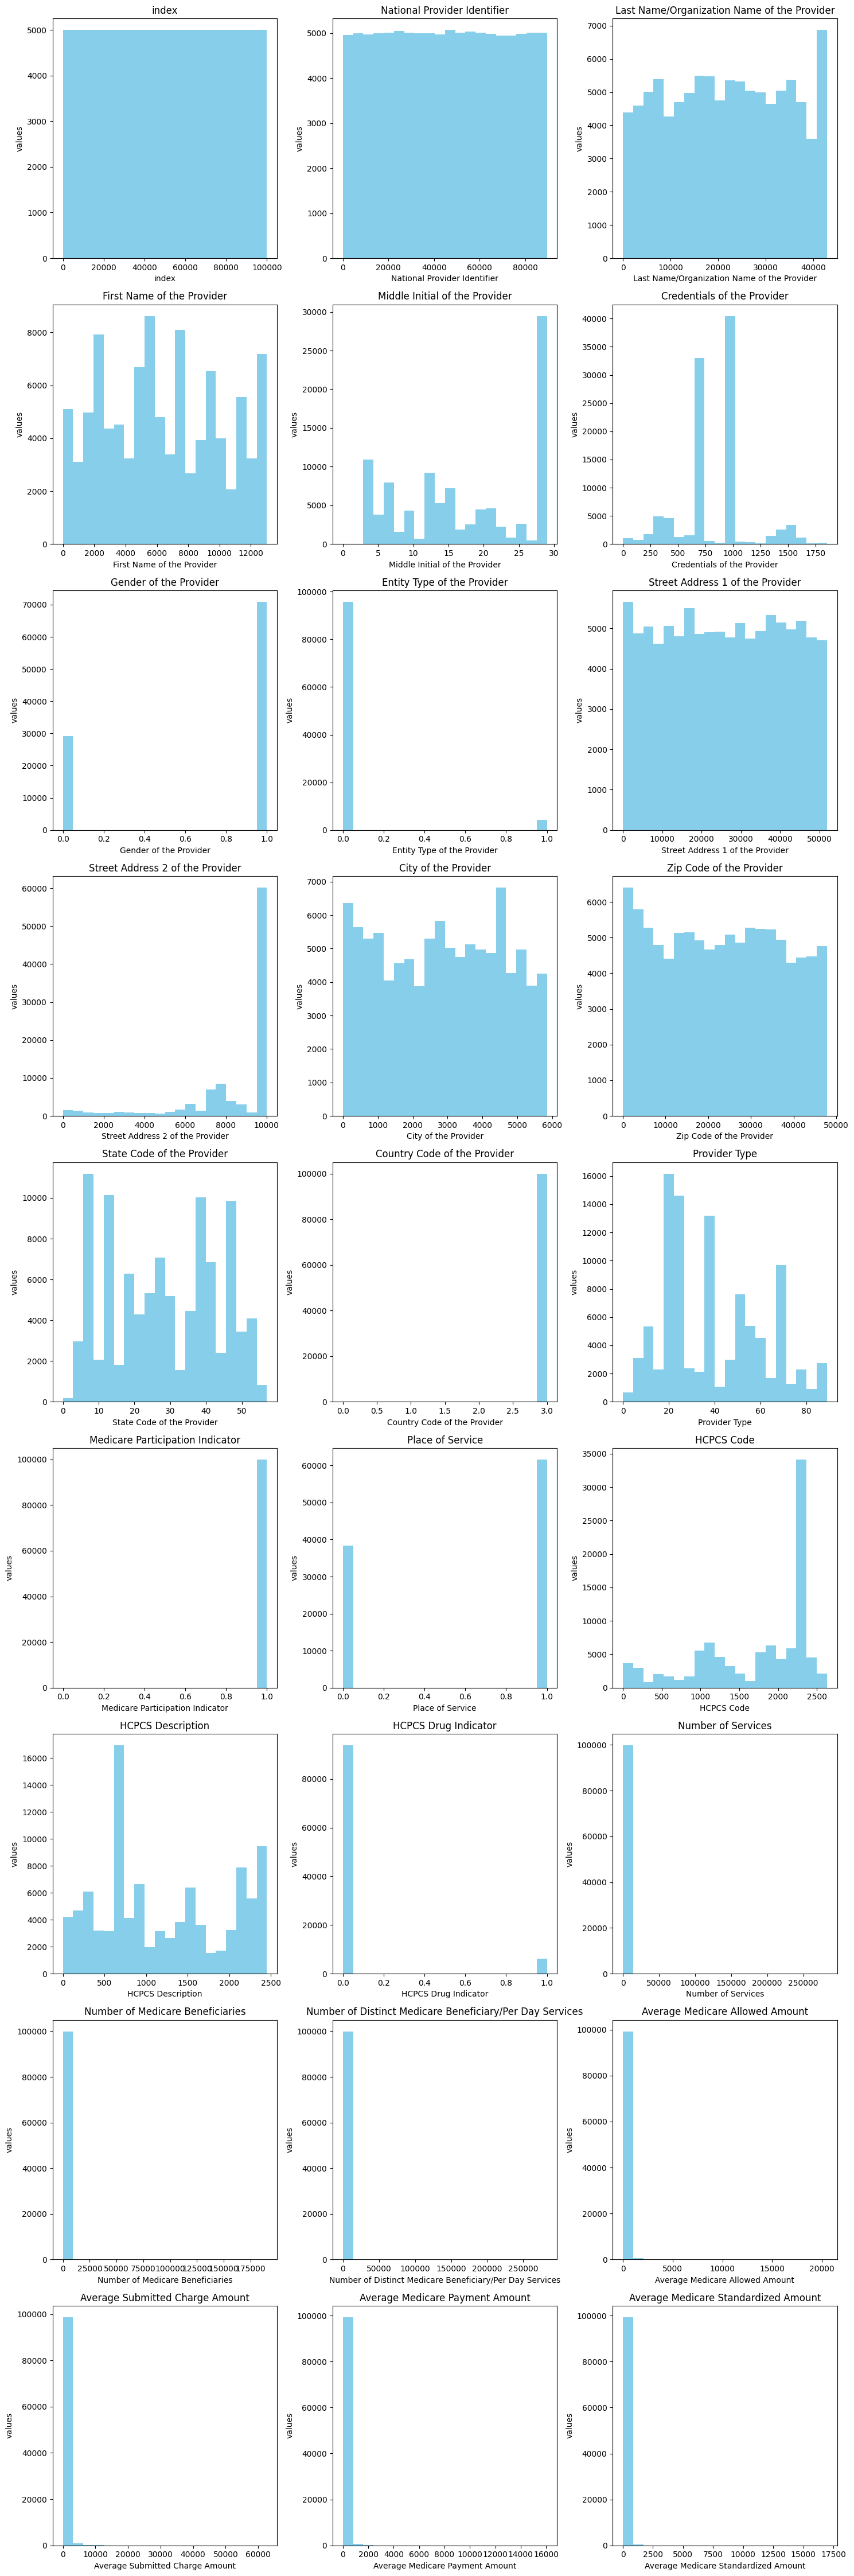

In [ ]:
# Determine the number of rows and columns for the subplot grid
num_rows = int(len(df.columns) / 3)   # Compute the number of rows by dividing the number of columns in the dataframe by 3 and rounding down to an integer
num_cols = 3   # Set the number of columns to 3

# Create the figure and axis objects
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))   # Create the subplots with the given number of rows and columns, and set the figure size based on the number of rows

# Iterate through each column in the dataframe
for i, col in enumerate(df.columns):
    # Get the axis object for the current subplot
    ax = axs[int(i / num_cols), i % num_cols]
    # Plot a histogram for the current column using 20 bins and a skyblue color
    ax.hist(df[col], bins=20, color='skyblue')
    # Set the title of the current subplot to the name of the current column
    ax.set_title(col)
    # Set the x-axis label of the current subplot to the name of the current column
    ax.set_xlabel(f'{col}')
    # Set the y-axis label of the current subplot to "values"
    ax.set_ylabel('values')

# Adjust the spacing between the subplots to prevent overlapping text
plt.tight_layout()

# Display the plot
plt.show()


# **Plotting Boxplots for each Feature**

---



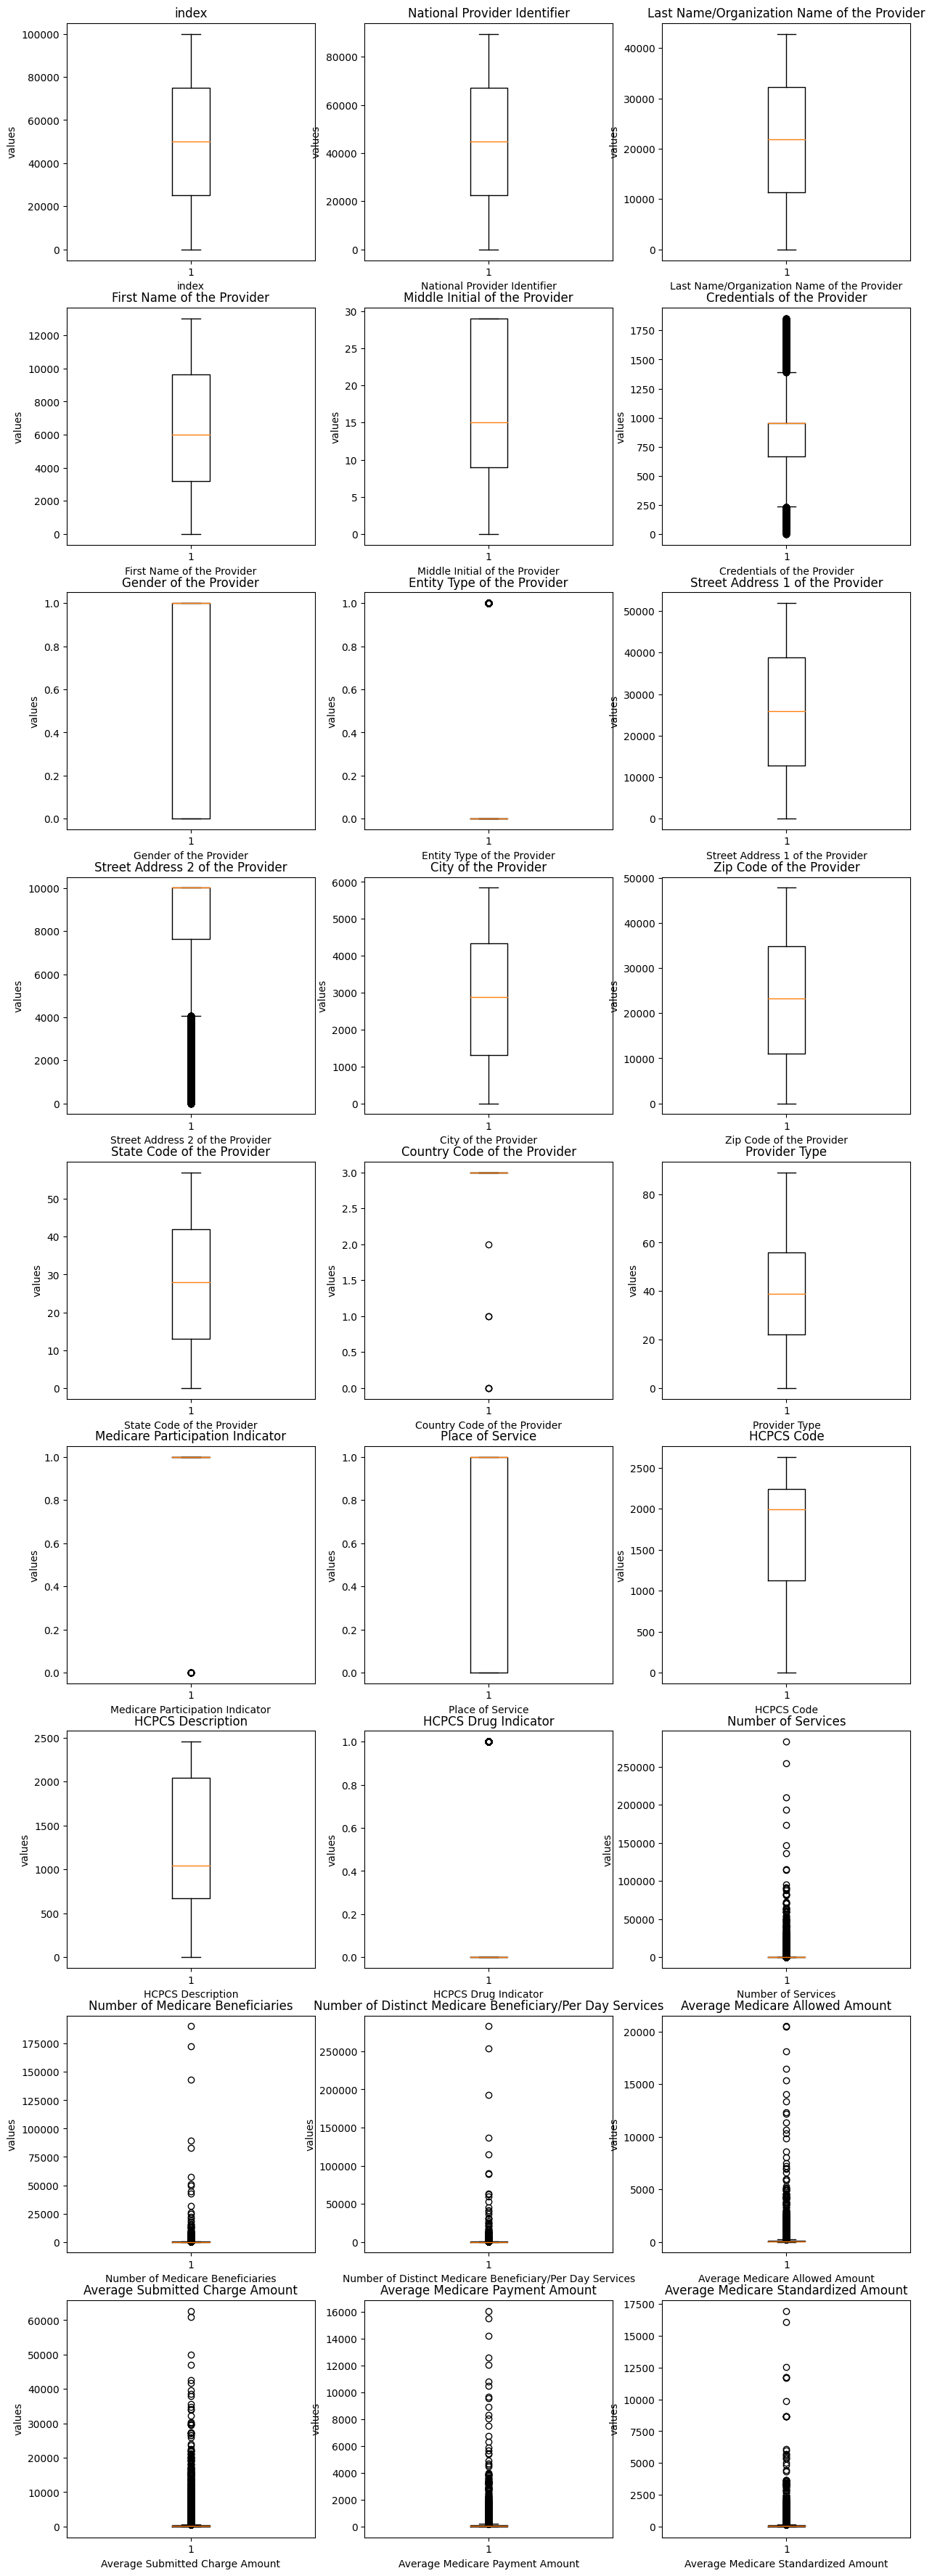

In [ ]:
# Determine the number of rows and columns for the subplot grid
num_rows = int(len(df.columns) / 3)   # Compute the number of rows by dividing the number of columns in the dataframe by 3 and rounding down to an integer
num_cols = 3   # Set the number of columns to 3

# Create the figure and axis objects
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))   # Create the subplots with the given number of rows and columns, and set the figure size based on the number of rows

# Iterate through each column in the dataframe
for i, col in enumerate(df.columns):
    # Get the axis object for the current subplot
    ax = axs[int(i / num_cols), i % num_cols]
    # Plot a boxplot for the current column
    ax.boxplot(df[col])
    # Set the title of the current subplot to the name of the current column
    ax.set_title(col)
    # Set the x-axis label of the current subplot to the name of the current column
    ax.set_xlabel(f'{col}')
    # Set the y-axis label of the current subplot to "values"
    ax.set_ylabel('values')

# Display the plot
plt.show()


# **Plotting Pairplots**

---



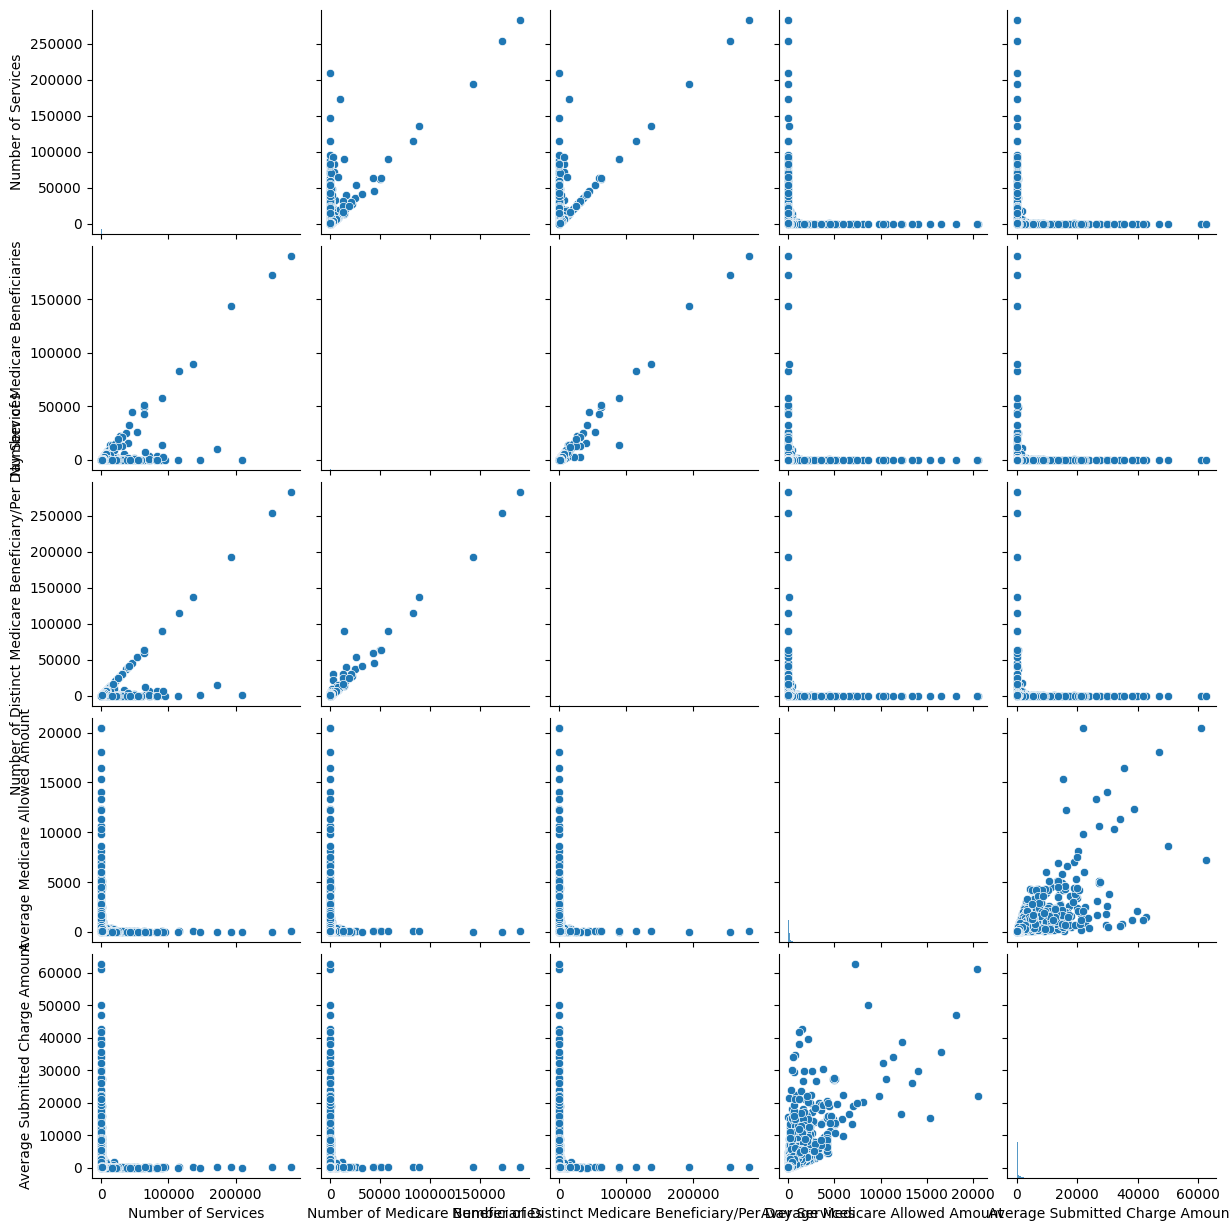

In [ ]:
df_pair = df.iloc[:,[20,21,22,23,24]]
sns.pairplot(df_pair)
#sns.pairplot(df_pair,hue = ‘smoker’,diag_kind = “kde”,kind = “scatter”,palette = “husl”)
# df_pair

# **Dropping unwanted columns**

---



In [ ]:
DropCols = ['index', 'National Provider Identifier', 'Last Name/Organization Name of the Provider', 
            'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
            'Street Address 2 of the Provider','Zip Code of the Provider','HCPCS Code']

df = df.drop(DropCols, axis = 1)

# **Standardisation**

---



In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Create a copy of the original dataframe
df_scaled=df.copy()

# Iterate through each column in the dataframe
for i in df:
  # Apply the StandardScaler function to the values of the current column and reshape them to a 2D array
  df_scaled[i] = scaler.fit_transform(df[i].values.reshape(-1,1))

# Create a new pandas dataframe with the standardized values and the same column names as the original dataframe
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

# Display the first 5 rows of the scaled dataframe
df_scaled.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,-0.488080,-1.560716,-0.210784,0.998857,-0.021772,0.007379,-0.037953,0.01761,-1.266985,-0.336239,-0.257051,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299
1,-0.488080,-1.560716,-0.210784,-0.727201,0.175119,0.007379,0.660735,0.01761,0.789275,1.105866,-0.257051,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359
2,-1.241767,0.640731,-0.210784,0.481099,-1.268747,0.007379,1.452582,0.01761,0.789275,-0.736897,-0.257051,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154
3,0.463081,0.640731,-0.210784,-0.195833,-0.021772,0.007379,-0.037953,0.01761,0.789275,1.472031,-0.257051,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921
4,-1.333921,0.640731,-0.210784,-0.204118,-1.071857,0.007379,-0.037953,0.01761,0.789275,-0.328279,-0.257051,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800


# **Applying PCA to the scaled data**

---



In [ ]:
# Using PCA to reduce the dimensions of the dataset into 2
X=np.array(df_scaled)
X_orig=np.array(df_scaled)
# instantiate PCA object
pca = PCA(n_components=2)
# fit PCA to data
pca.fit(X)
# transform data to PCA space
X_pca = pca.transform(X)
print(X_pca)

[[ 0.65208568 -0.21569398]
 [ 0.19279712 -0.02636448]
 [-0.23766432 -0.14695156]
 ...
 [-0.38522318 -0.17404816]
 [-0.6512603  -0.18666654]
 [-0.7368732   0.12066349]]


# **Scatter plot of the dimension reduced dataset**

---



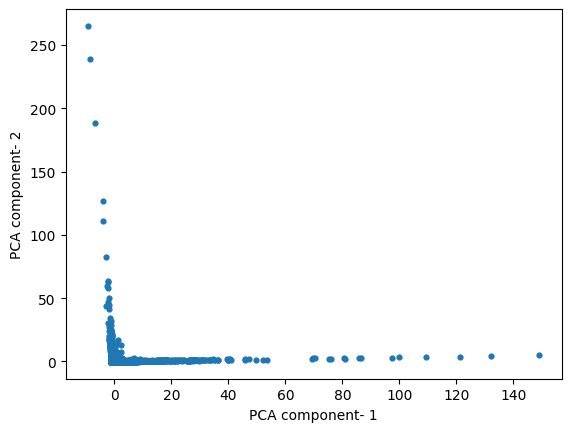

In [ ]:
# create scatter plot
plt.scatter(X_pca[:,0], X_pca[:,1],s=12)

# add labels and title
plt.xlabel('PCA component- 1')
plt.ylabel('PCA component- 2')

# show plot
plt.show()


# **Box Plot of the dimension reduced Dataset**

---



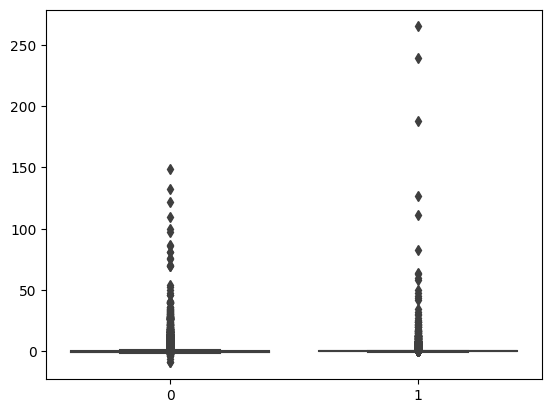

In [ ]:
# create box plot
sns.boxplot(X_pca)
# show plot
plt.show()

# **Detecting anamoly using KNN Algorithm**

---



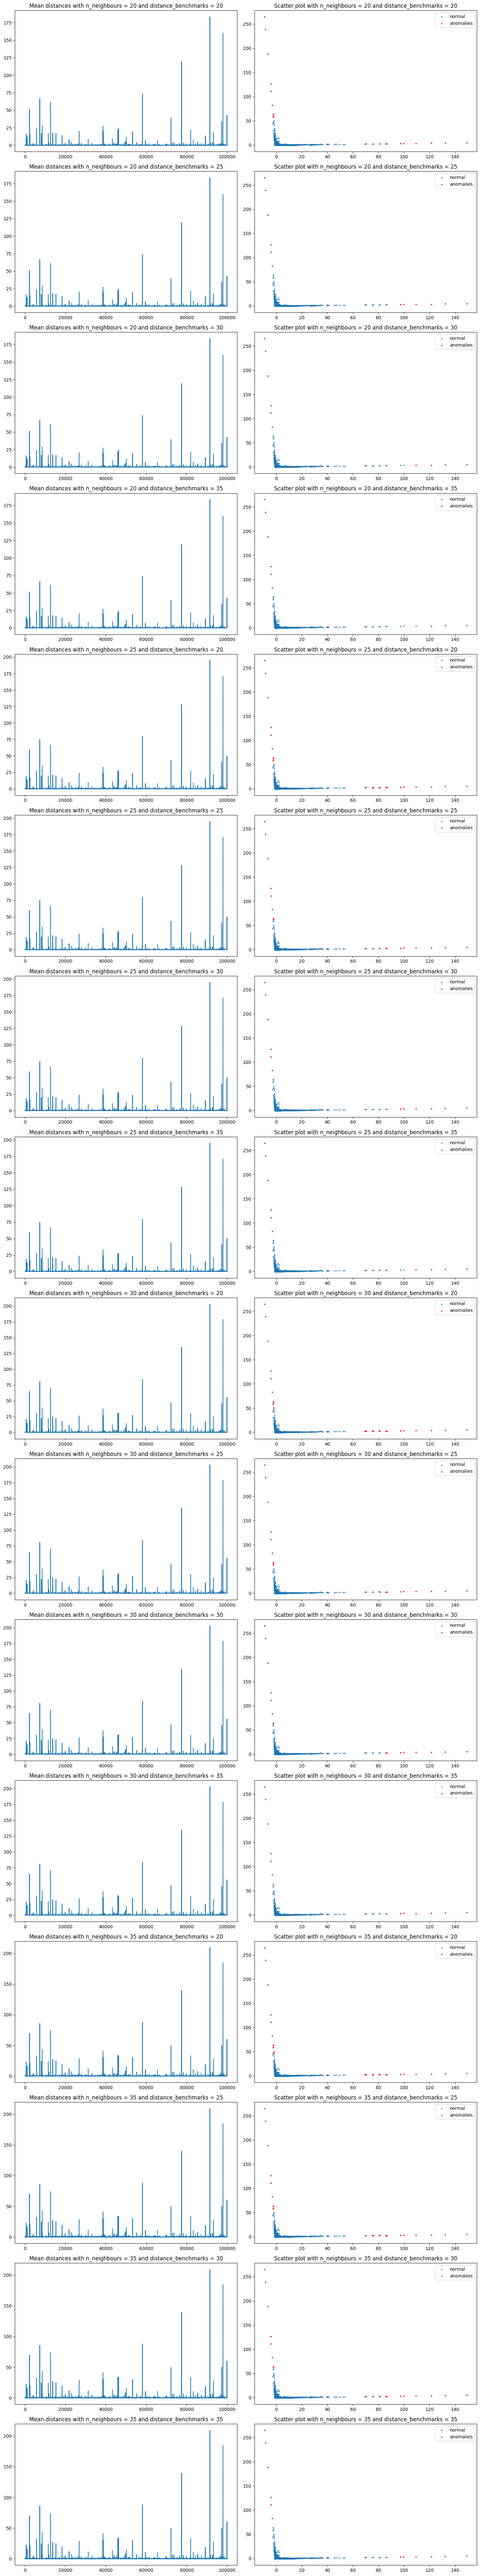

In [ ]:
# Import necessary libraries
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Define values for the number of neighbors and distance benchmarks
n_neighbours_lis = [20, 25, 30, 35]
distance_benchmarks = [20, 25, 30, 35]

# Create a figure with 16 subplots
fig, axs = plt.subplots(16, 2, figsize=(15, 5*16))
axs = axs.flatten()  # Flatten the array of subplots for easier indexing
c = 0  # Initialize a counter

# Loop over the number of neighbors and distance benchmarks
for i in range(4):
    for k in range(4):
        ind = []  # Create an empty list to store indices of points with mean distance greater than the benchmark

        # Create a NearestNeighbors object with the specified number of neighbors
        K_nbrs = NearestNeighbors(n_neighbors=n_neighbours_lis[i])
        # Fit the model to the data
        K_nbrs.fit(X_pca)
        # Compute the distances and indices of the k nearest neighbors for each point in the data
        distances, indexes = K_nbrs.kneighbors(X_pca)

        # Plot the mean distance for each point over all neighbors
        axs[c].plot(distances.mean(axis=1))
        axs[c].set_title(f"Mean distances with n_neighbours = {n_neighbours_lis[i]} and distance_benchmarks = {distance_benchmarks[k]}")

        # Identify indices of points with mean distance greater than the benchmark
        for j in range(len(X_pca)):
            if distances[j].mean() > distance_benchmarks[k]:
                ind.append(j)

        # Create a scatter plot of the data, with points that meet the distance criterion highlighted in red
        axs[c+1].scatter(X_pca[:, 0], X_pca[:, 1],s=3,label="normal")
        axs[c+1].scatter(X_pca[ind, 0], X_pca[ind, 1], c='r',s=3,label="anomalies")
        axs[c+1].legend()
        axs[c+1].set_title(f"Scatter plot with n_neighbours = {n_neighbours_lis[i]} and distance_benchmarks = {distance_benchmarks[k]}")

        # Increment the counter by 2 to move to the next pair of subplots
        c += 2

# Adjust the layout of the subplots and display the figure
plt.tight_layout()
plt.show()



---



# **Detecting Anomaly using K-means Algorithm**

---



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

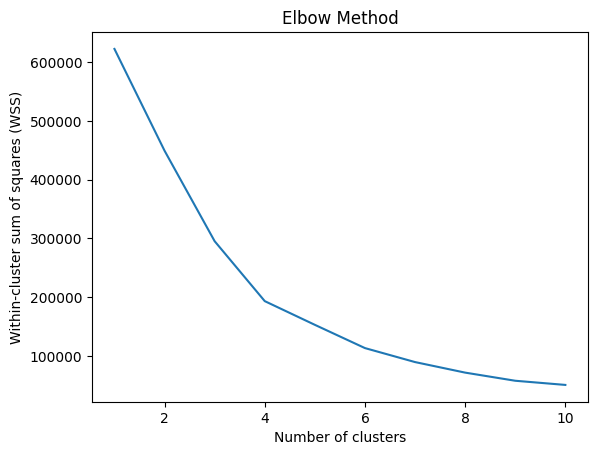

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store within-cluster sum of squares (WSS) values
wss = []

# Loop over a range of cluster numbers from 1 to 10
for k in range(1, 11):
    # Create a KMeans model with the specified number of clusters and a fixed random seed
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the data
    kmeans.fit(X_pca)
    # Compute and store the within-cluster sum of squares
    wss.append(kmeans.inertia_)

# Plot the WSS values against the number of clusters
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


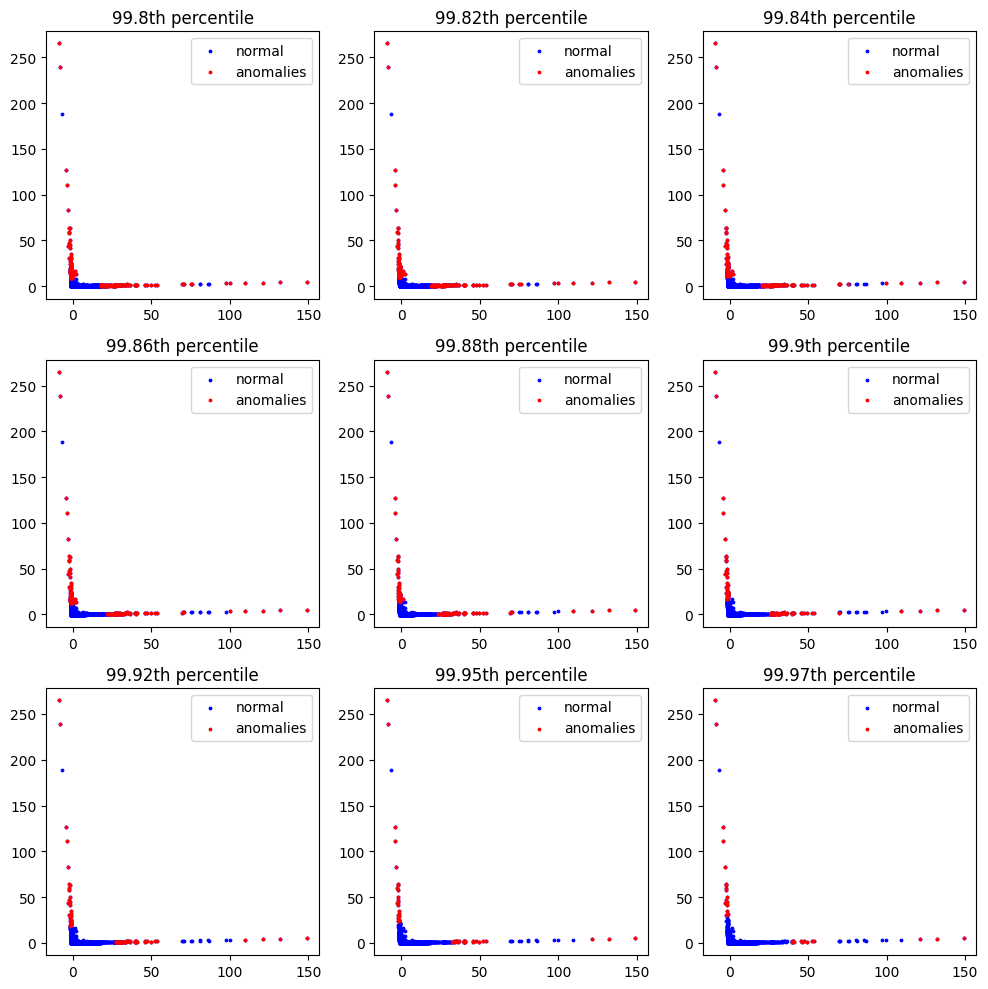

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Create a KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=4)

# Define a list of percentiles to use as thresholds for the maximum distance from cluster center
percentiles_formax_dist = [99.8, 99.82, 99.84, 99.86, 99.88, 99.90, 99.92, 99.95, 99.97]

# Fit the KMeans model to the data
kmeans.fit(X_pca)

# Compute the distance to each cluster center for each data point
distances = np.min(kmeans.transform(X_pca), axis=1)

# Create a 3x3 grid of subplots to show the results for different thresholds
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()

# Loop over the subplots and set the threshold to the i-th percentile
for i, ax in enumerate(axs):
    threshold = np.percentile(distances, percentiles_formax_dist[i])

    # Find the data points that are anomalous (i.e., farther than the threshold from any cluster center)
    anomalous_points = X_pca[distances > threshold]

    # Plot the data points in blue and the anomalous points in red
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c='blue',s=3,label="normal")
    ax.scatter(anomalous_points[:, 0], anomalous_points[:, 1],s=3, c='red',label="anomalies")
    ax.legend()
    ax.set_title(f'{percentiles_formax_dist[i]}th percentile')

# Adjust the layout of the subplots and display the figure
plt.tight_layout()
plt.show()

# **Detecting Anomaly using Isolation Forest**

---



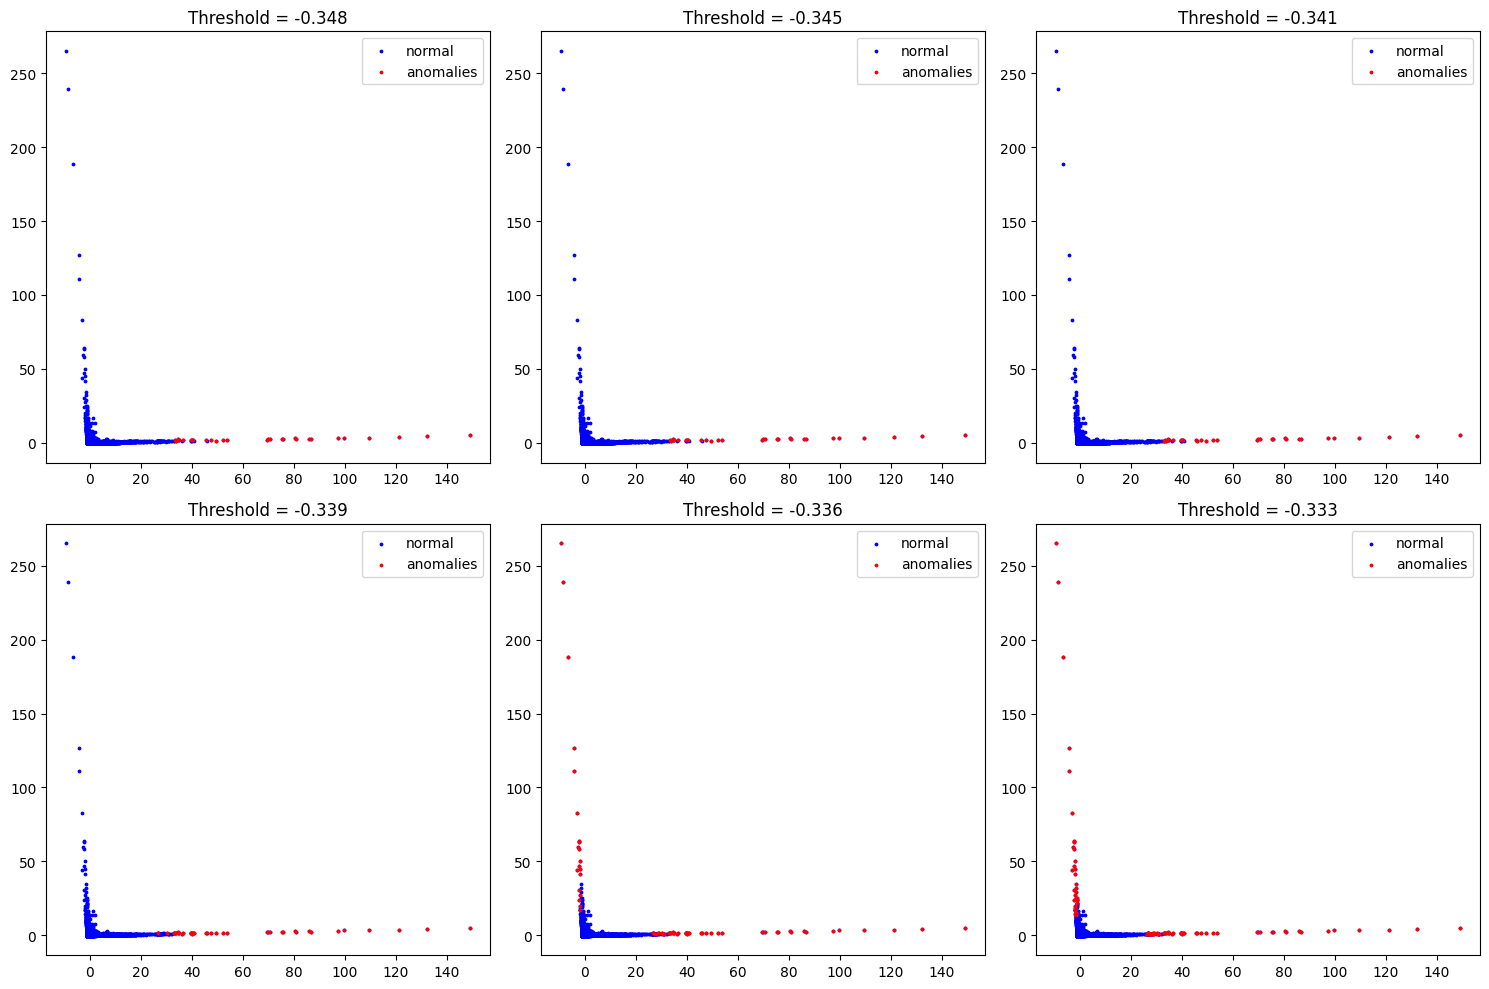

In [ ]:
# Import the necessary library
from sklearn.ensemble import IsolationForest

# Define a list of threshold values to test
thresholds = [-0.348, -0.345, -0.341, -0.339, -0.336, -0.333]

# Train the Isolation Forest model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1), random_state=42)
model.fit(X_pca)

# Create a figure with 2 rows and 3 columns of subplots
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# For each threshold value, predict anomalies and plot them in a subplot
for i, ax in zip(thresholds, axs.flatten()):
    # Compute the anomaly scores for each data point
    anomaly_scores = model.decision_function(X_pca)
    # Set the threshold based on the current value in the loop
    threshold = i
    # Select the data points with an anomaly score lower than the threshold
    anomalies = X_pca[anomaly_scores < threshold]
    
    # Plot the data points with normal scores in blue and anomalies in red
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c='blue',s=3, label='normal')
    ax.scatter(anomalies[:, 0], anomalies[:, 1], c='red',s=3, label='anomalies')
    ax.legend()
    ax.set_title(f"Threshold = {threshold:.3f}")
    
    # Count the number of data points with anomaly scores lower than threshold
    ct = sum(anomaly_scores < -0.341)

# Adjust spacing between subplots and show the plot
plt.tight_layout()
plt.show()

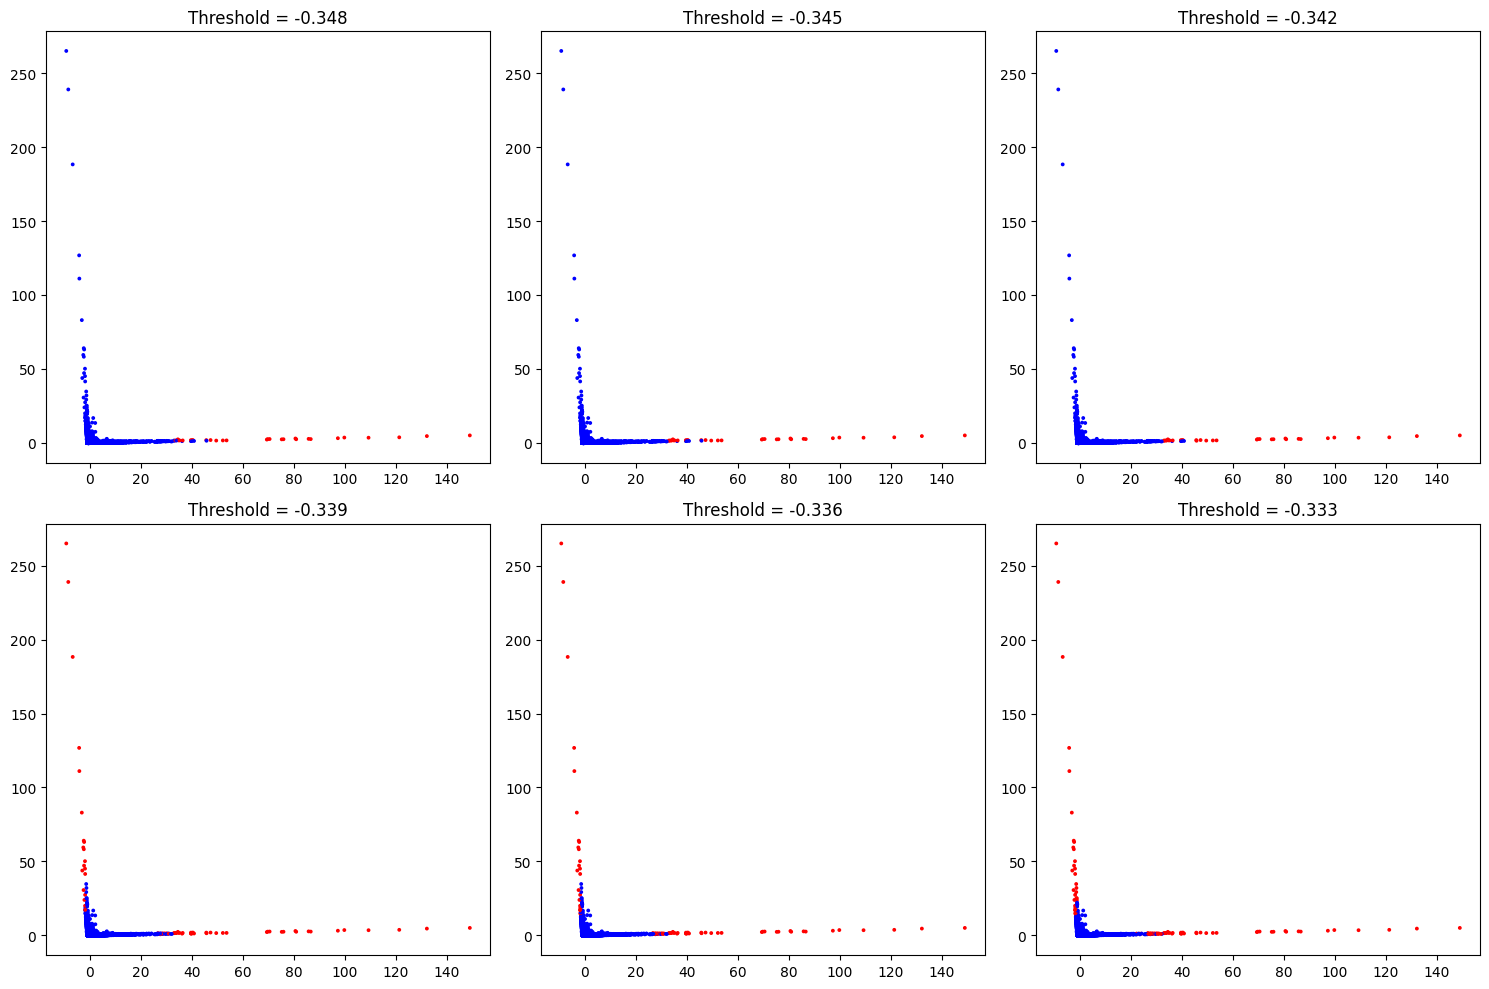

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Train the Isolation Forest model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1), random_state=42)
model.fit(X_pca)

# Generate a range of threshold values
thresholds = np.linspace(-0.348, -0.333, 6)

# Create a figure with 2 rows and 3 columns of subplots
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# For each threshold value, predict anomalies and plot them in a subplot
for threshold, ax in zip(thresholds, axs.flatten()):
    # Compute the anomaly scores for each data point
    anomaly_scores = model.decision_function(X_pca)
    # Select the data points with an anomaly score lower than the threshold
    anomalies = X_pca[anomaly_scores < threshold]
    
    # Plot the data points with normal scores in blue and anomalies in red
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=np.where(anomaly_scores < threshold, 'red', 'blue'),s=3)
    ax.set_title(f"Threshold = {threshold:.3f}")

# Adjust spacing between subplots and show the plot
plt.tight_layout()
plt.show()

# **Detecting Anomaly using Local Outlier Factor**

---



With PCA

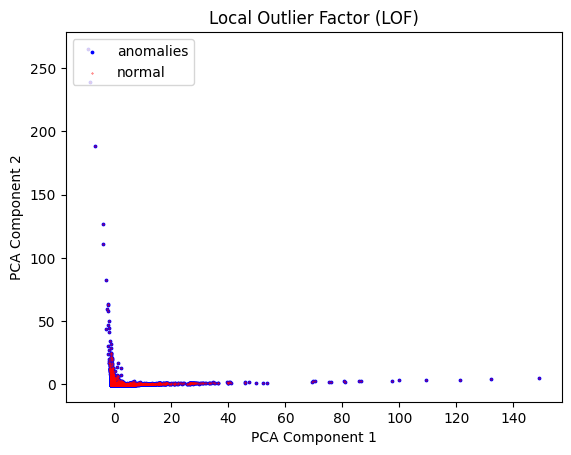

In [ ]:
# Define the LOF algorithm with desired parameters
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Use fit_predict method to fit the model to the data and get predicted labels
# (since LOF is used for outlier detection, there are no predict, decision_function or score_samples methods)
y_pred = clf.fit_predict(X_pca)

# Get the negative outlier factor scores for each data point
X_scores = clf.negative_outlier_factor_

# Plot the data points using a scatter plot with blue color for anomalies and red color for normal data points
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:, 0], X_pca[:, 1], color="b", s=3.0, label="anomalies")
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=.1, c="r", label="normal")

legend = plt.legend(loc="upper left")

plt.axis("tight")
plt.xlabel('PCA Component 1')               # Set the x-axis label
plt.ylabel('PCA Component 2') 
# Show the plot
plt.show()

Without PCA

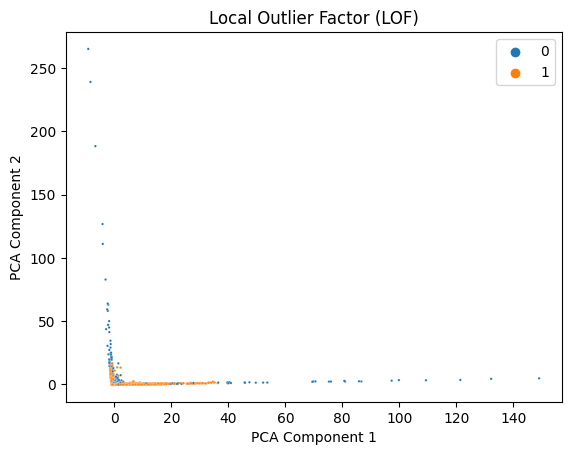

In [ ]:
# Define the LOF algorithm with desired parameters
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Use fit_predict method to fit the model to the data and get predicted labels
# (since LOF is used for outlier detection, there are no predict, decision_function or score_samples methods)
y_pred = clf.fit_predict(X_orig)

# Get the negative outlier factor scores for each data point
y_pred[y_pred == 1] = 1
y_pred[y_pred == -1] = 0

plt.title("Local Outlier Factor (LOF)")
# plt.scatter(x='principal component 1', y='principal component 2', alpha = .6, c=Y)
sns.scatterplot(x='principal component 1', y='principal component 2', hue=y_pred,s=3, data=pd.DataFrame(X_pca,columns=["principal component 1","principal component 2"]))
plt.xlabel('PCA Component 1')               # Set the x-axis label
plt.ylabel('PCA Component 2') 
plt.show()

# **Anomaly detection using One Class SVM**

---



OneClassSVM(gamma=0.001, nu=0.02)
187.56735473564257


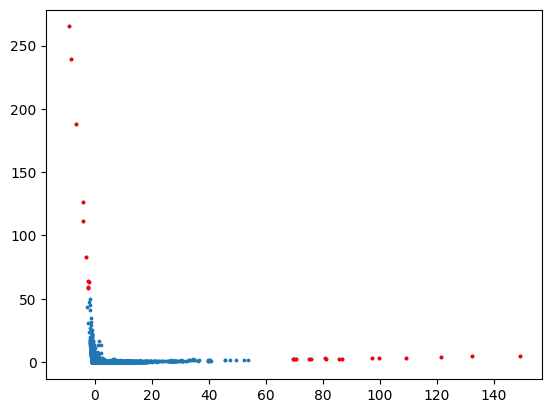

In [32]:
from sklearn.svm import OneClassSVM

from numpy import quantile, where, random
import matplotlib.pyplot as plt

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
print(svm)

pred = svm.fit_predict(X_pca)
scores = svm.score_samples(X_pca)

thresh = quantile(scores, 0.00025)
print(thresh)
index = where(scores<=thresh)
values = X_pca[index]

plt.scatter(X_pca[:,0], X_pca[:,1],s=3)
plt.scatter(values[:,0], values[:,1],s=3, color='r')
plt.show()